In [43]:
!pip install Keras
!pip install keras-layer-normalization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Import libraries

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import numpy as np
np.random.seed(5)
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as pyplot
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
import collections


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Read and store data

In [46]:
data = pd.read_csv("/content/drive/MyDrive/UPM/Internship/Clinical_data_and_RNA_total_Features_PFS.csv")
data

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176,RCC_73_T_SCR,77.0,0.0,0.0,1.0,42.0,11.000000,1.906849,1.374775,...,31.62442,30.78532,30.86517,30.92600,31.53239,23.65585,32.42073,34.41045,33.21697,32.22166
177,177,RCC_90_T_SCR,54.0,0.0,0.0,1.0,42.0,57.000000,1.183562,1.374775,...,31.40147,31.50200,29.96535,30.21446,31.49627,28.04168,32.19568,32.69615,32.18970,32.59554
178,178,RCC_93_T_SCR,64.0,0.0,0.0,1.0,42.0,-43.000000,16.438356,1.374775,...,31.21094,30.91066,31.35764,30.99788,31.45772,23.65585,32.36832,35.02409,34.26388,32.82148
179,179,RCC_96_T_SCR,75.0,0.0,0.0,1.0,42.0,12.000000,1.216438,1.374775,...,31.12324,28.76312,31.48891,30.27351,32.88316,23.65585,31.76924,34.07224,34.35116,31.98965


In [47]:
Y = data.PFS
Y

0      12.164384
1       5.490411
2      61.906849
3       1.249315
4       5.654795
         ...    
176     1.906849
177     1.183562
178    16.438356
179     1.216438
180     1.347945
Name: PFS, Length: 181, dtype: float64

In [48]:
data = data.iloc[:,28:43921] 
data

,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,21.038652,35.199603,30.187983,22.999432,33.643965,37.130851,22.705126,22.869853,21.076515,21.271282,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,21.038652,38.183943,30.483638,25.581769,28.866645,37.945043,27.797609,24.142100,21.076515,21.271282,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,21.038652,37.141292,30.092851,26.933385,26.684228,36.851946,22.705126,30.406352,21.076515,21.271282,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,21.038652,36.447015,30.975010,26.683128,32.521495,38.453517,26.337846,28.229357,21.076515,21.271282,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,21.038652,37.623923,26.915750,22.999432,23.219176,38.931987,22.705126,22.869853,21.076515,21.271282,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,21.038043,36.338729,30.954407,27.310879,26.161567,38.376185,25.971821,24.438322,21.076088,21.056491,...,31.62442,30.78532,30.86517,30.92600,31.53239,23.65585,32.42073,34.41045,33.21697,32.22166
177,21.038043,38.248915,33.110149,26.793199,26.161567,36.537388,26.388265,24.438322,21.076088,21.056491,...,31.40147,31.50200,29.96535,30.21446,31.49627,28.04168,32.19568,32.69615,32.18970,32.59554
178,21.038043,35.884812,32.880283,25.659842,31.822942,38.265866,26.504307,24.438322,21.076088,21.056491,...,31.21094,30.91066,31.35764,30.99788,31.45772,23.65585,32.36832,35.02409,34.26388,32.82148
179,21.038043,35.283776,30.658715,27.533890,32.930512,36.882090,26.303147,24.438322,21.076088,21.056491,...,31.12324,28.76312,31.48891,30.27351,32.88316,23.65585,31.76924,34.07224,34.35116,31.98965


# 4. Data preprocessing

In [49]:
data = data.iloc[:,0:-1].apply(lambda x: (x-x.min())/ (x.max() - x.min()), axis=0)

In [50]:
data

,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
0,0.006914,0.192547,0.678662,0.381792,0.845335,0.575510,0.406032,0.236690,1.00000,0.089018,...,0.572566,0.929002,0.707656,0.519926,0.818608,0.691080,0.768420,0.341273,0.319148,0.379277
1,0.006914,0.695755,0.697819,0.571002,0.528869,0.756444,0.831889,0.325159,1.00000,0.089018,...,0.579149,0.747821,0.698606,0.608854,0.774338,0.605338,0.613249,0.718327,0.277535,0.343460
2,0.006914,0.519947,0.672498,0.670036,0.384299,0.513530,0.406032,0.760759,1.00000,0.089018,...,0.505492,0.665007,0.881304,0.595015,0.664706,0.486968,0.613774,0.713857,0.359348,0.305331
3,0.006914,0.402881,0.729657,0.651699,0.770979,0.869440,0.709817,0.609376,1.00000,0.089018,...,0.585805,0.757826,0.768942,0.666409,0.683158,0.550008,0.724594,0.703152,0.524786,0.386329
4,0.006914,0.601326,0.466640,0.381792,0.154762,0.975769,0.406032,0.236690,1.00000,0.089018,...,1.000000,0.770824,0.772036,0.559070,0.666957,0.285936,0.165994,0.761196,0.439863,0.858704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.006842,0.384622,0.728322,0.697695,0.349676,0.852255,0.679208,0.345757,0.99572,0.038915,...,0.610809,0.757037,0.775099,0.620211,0.808260,0.438924,0.368201,0.645897,0.487243,0.377024
177,0.006842,0.706710,0.868002,0.659764,0.349676,0.443627,0.714033,0.345757,0.99572,0.038915,...,0.324568,0.733713,0.840000,0.440543,0.675089,0.428234,0.770813,0.587648,0.000000,0.077178
178,0.006842,0.308084,0.853108,0.576722,0.724704,0.827739,0.723737,0.345757,0.99572,0.038915,...,0.796405,0.713780,0.786450,0.718543,0.821713,0.416825,0.368201,0.632332,0.661653,0.682603
179,0.006842,0.206740,0.709163,0.714035,0.798074,0.520229,0.706915,0.345757,0.99572,0.038915,...,0.388617,0.704605,0.591975,0.744754,0.686141,0.838682,0.368201,0.477274,0.391116,0.708079


In [51]:
label =[]
for i in Y:
  if i<3:
    label.append(0)
  elif i<6:
    label.append(1)
  else:
    label.append(2)
# X_train, X_test, Y_train, Y_test = train_test_split(data, label,test_size=0.2, random_state=125, stratify=label)

In [52]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

TRAIN:  [ 16  17  19  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 20 21]
Epoch 1/100
11/11 - 6s - loss: 0.0922 - val_loss: 9.2007 - 6s/epoch - 527ms/step
Epoch 2/100
11/11 - 3s - loss: 0.0467 - val_loss: 0.9734 - 3s/epoch - 280ms/step
Epoch 3/100
11/11 - 4s - loss: 0.0350 - val_loss: 0.2454 - 4s/epoch - 340ms/step
Epoch 4/100
11/11 - 3s - l

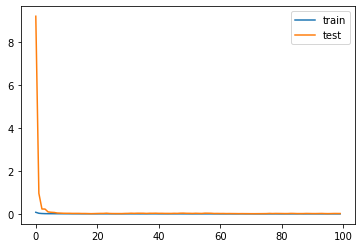

1/1 [==============================] - 0s 230ms/step


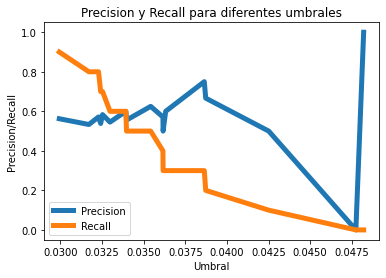

Final accuracy on the testing dataset: 0.8421052631578947
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  18  20
  21  30  32  33  34  39  40  41  42  44  45  46  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180] TEST: [16 17 19 22 23 24 25 26 27 28 29 31 35 36 37 38 43 47]
Epoch 1/100
11/11 - 5s - loss: 0.0943 - val_loss: 1.6012 - 5s/epoch - 457ms/step
Epoch 2/100
11/11 - 3s - loss: 0.0581 - val_loss: 0.7847 - 3s/epoch - 296ms/step
Epoch 3/100
11/11 - 3s - loss: 0.0355 - val_los

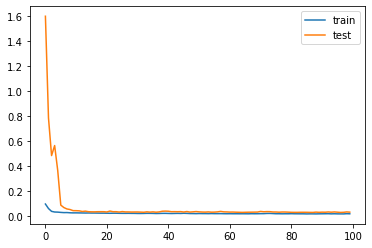

1/1 [==============================] - 0s 260ms/step


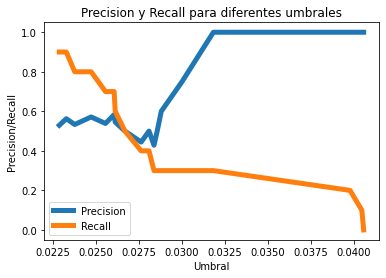

Final accuracy on the testing dataset: 0.8888888888888888
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  31  35  36  37  38  43
  46  47  49  53  56  57  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180] TEST: [30 32 33 34 39 40 41 42 44 45 48 50 51 52 54 55 58 59]
Epoch 1/100
11/11 - 5s - loss: 0.0961 - val_loss: 2.8473 - 5s/epoch - 441ms/step
Epoch 2/100
11/11 - 3s - loss: 0.0431 - val_loss: 0.6215 - 3s/epoch - 280ms/step
Epoch 3/100
11/11 - 3s - loss: 0.0316 - val_los

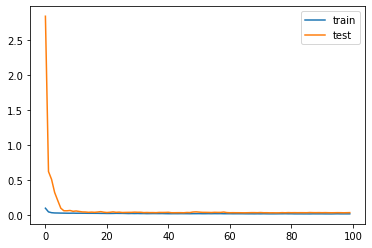

1/1 [==============================] - 0s 211ms/step


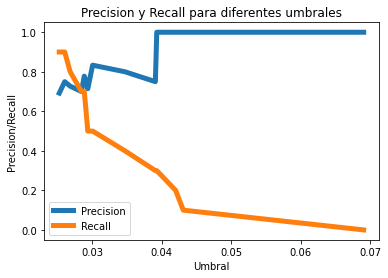

Final accuracy on the testing dataset: 0.8333333333333334
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  47  48  50  51  52  54  55  58
  59  70  72  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180] TEST: [46 49 53 56 57 60 61 62 63 64 65 66 67 68 69 71 73 74]
Epoch 1/100
11/11 - 5s - loss: 0.0946 - val_loss: 2.5894 - 5s/epoch - 447ms/step
Epoch 2/100
11/11 - 3s - loss: 0.0437 - val_loss: 0.9338 - 3s/epoch - 281ms/step
Epoch 3/100
11/11 - 3s - loss: 0.0332 - val_los

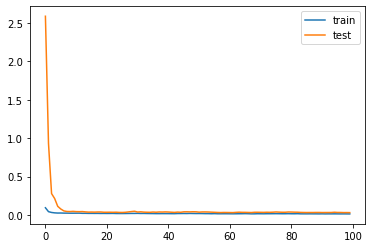

1/1 [==============================] - 0s 191ms/step


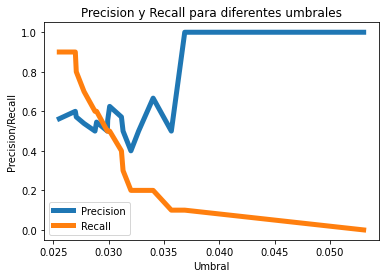

Final accuracy on the testing dataset: 0.9444444444444444
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  71  73
  74  77  91  92  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180] TEST: [70 72 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90 93]
Epoch 1/100
11/11 - 5s - loss: 0.0921 - val_loss: 4.9788 - 5s/epoch - 493ms/step
Epoch 2/100
11/11 - 3s - loss: 0.0543 - val_loss: 0.8999 - 3s/epoch - 268ms/step
Epoch 3/100
11/11 - 3s - loss: 0.0358 - val_los

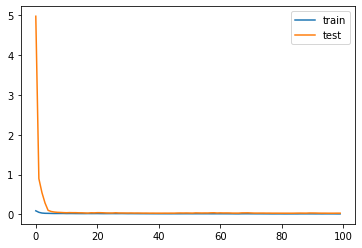

1/1 [==============================] - 0s 209ms/step


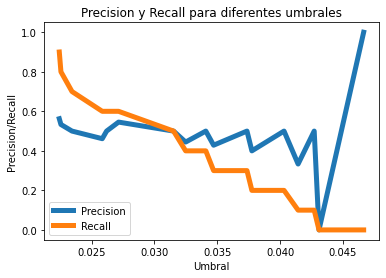

Final accuracy on the testing dataset: 0.7222222222222222
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  88  89  90
  93 108 109 110 111 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180] TEST: [ 77  91  92  94  95  96  97  98  99 100 101 102 103 104 105 106 107 112]
Epoch 1/100
11/11 - 5s - loss: 0.0972 - val_loss: 1.2962 - 5s/epoch - 469ms/step
Epoch 2/100
11/11 - 3s - loss: 0.0490 - val_loss: 0.3713 - 3s/epoch - 275ms/step
Epoch 3/100
11/11 - 3s - loss

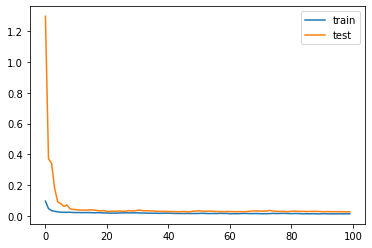

1/1 [==============================] - 0s 260ms/step


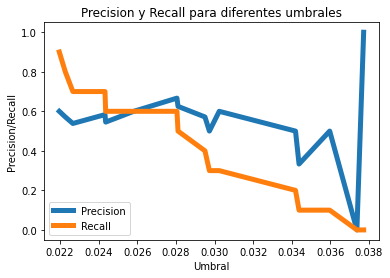

Final accuracy on the testing dataset: 1.0
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 112 126 127 128 129 130 131 132 133 134 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180] TEST: [108 109 110 111 113 114 115 116 117 118 119 120 121 122 123 124 125 135]
Epoch 1/100
11/11 - 6s - loss: 0.0933 - val_loss: 5.1485 - 6s/epoch - 580ms/step
Epoch 2/100
11/11 - 4s - loss: 0.0458 - val_loss: 2.1606 - 4s/epoch - 395ms/step
Epoch 3/100
11/11 - 4s - loss: 0.0343 - val_

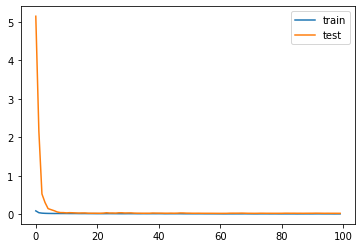

1/1 [==============================] - 0s 260ms/step


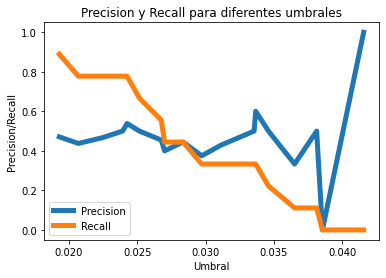

Final accuracy on the testing dataset: 0.9444444444444444
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 135 142 144 145 146 147 148 149 150 151 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180] TEST: [126 127 128 129 130 131 132 133 134 136 137 138 139 140 141 143 152 153]
Epoch 1/100
11/11 - 7s - loss: 0.0956 - val_loss: 1.6671 - 7s/epoch - 592ms/step
Epoch 2/100
11/11 - 4s - loss: 0.0440 - val_loss: 0.3088 - 4s/epoch - 395ms/step
Epoch 3/100
11/11 - 4s - loss

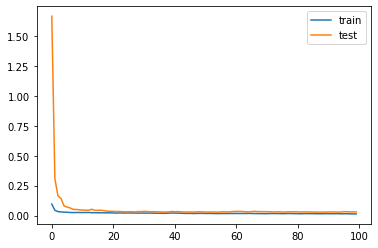

1/1 [==============================] - 0s 245ms/step


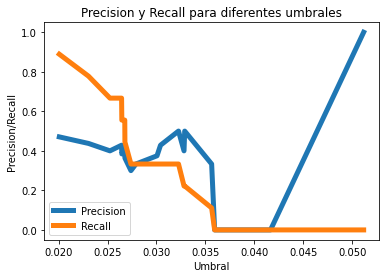

Final accuracy on the testing dataset: 0.8888888888888888
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 143 152
 153 154 156 159 160 162 165 167 170 171 172 173 174 175 176 177 178 179
 180] TEST: [142 144 145 146 147 148 149 150 151 155 157 158 161 163 164 166 168 169]
Epoch 1/100
11/11 - 8s - loss: 0.0939 - val_loss: 5.4354 - 8s/epoch - 705ms/step
Epoch 2/100
11/11 - 4s - loss: 0.0478 - val_loss: 2.5333 - 4s/epoch - 396ms/step
Epoch 3/100
11/11 - 4s - loss

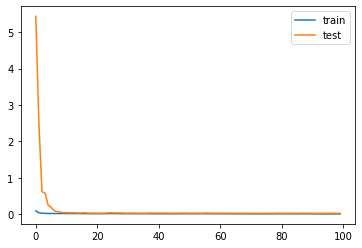

1/1 [==============================] - 0s 258ms/step


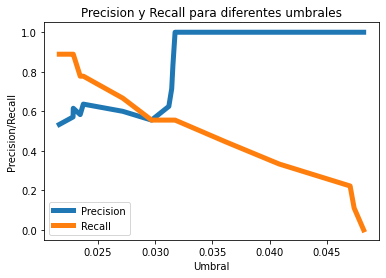

Final accuracy on the testing dataset: 0.7777777777777778
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 155 157 158 161 163 164 166 168
 169] TEST: [154 156 159 160 162 165 167 170 171 172 173 174 175 176 177 178 179 180]
Epoch 1/100
11/11 - 6s - loss: 0.0940 - val_loss: 7.5164 - 6s/epoch - 549ms/step
Epoch 2/100
11/11 - 4s - loss: 0.0461 - val_loss: 1.0449 - 4s/epoch - 374ms/step
Epoch 3/100
11/11 - 4s - loss

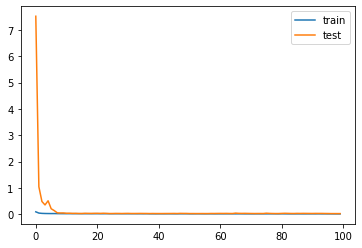

1/1 [==============================] - 0s 240ms/step


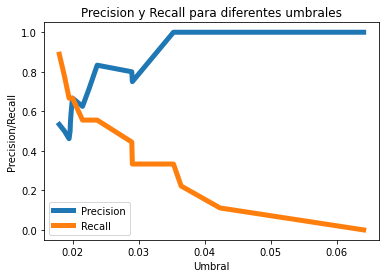

Final accuracy on the testing dataset: 0.8888888888888888
Final average: 0.8730994152046783


In [53]:
average = []
for train_index, test_index in kf.split(data, label):
  print("TRAIN: ", train_index, "TEST:", test_index)
  X_train, X_test = data.iloc[train_index], data.iloc[test_index]
  Y_train, Y_test =  np.array(label)[train_index.astype(int)],  np.array(label)[test_index.astype(int)]
  # np.savetxt("/content/drive/MyDrive/UPM/Internship/Autoencoder/Multiclass/43/input_data_multiclass_43.csv", X_train, delimiter=',')

  # Model -------------------------------------------
  n_inputs=X_train.shape[1]
  visible = Input(shape=(n_inputs,))
    # encoder level 1
  e = Dense(n_inputs/100)(visible)
  e = BatchNormalization()(e)
  e = LeakyReLU()(e)
    # encoder level 2
  e = Dense(200)(e)
  e = BatchNormalization()(e)
  e = LeakyReLU()(e)
    # bottleneck
  n_bottleneck = 200
  bottleneck = Dense(n_bottleneck)(e)
    # decoder, level 1
  d = Dense(200)(bottleneck)
  d = BatchNormalization()(d)
  d = LeakyReLU()(d)
    # decoder level 2
  d = Dense(n_inputs/100)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU()(d)
    # output layer
  output = Dense(n_inputs, activation='linear')(d)

  model = Model(inputs=visible, outputs=output)
  # Compile the model -------------------------------------------
  model.compile(optimizer='adam', loss='mse')

  # Model training -------------------------------------------
  nits = 100 
  tam_lote = 16
  history = model.fit(X_train, X_train, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(X_test,X_test), verbose=2)

  # Loss plots -------------------------------------------
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  # Model prediction -------------------------------------------
  X_pred = model.predict(X_test)
  MSE = np.mean(np.power(X_test-X_pred,2), axis=1)
  Y_test2=np.array(Y_test, dtype=bool)

  # Precission and recall curve plt -------------------------------------------
  precision, recall, umbral = precision_recall_curve(Y_test2, MSE)
  plt.plot(umbral, precision[1:], label="Precision",linewidth=5)
  plt.plot(umbral, recall[1:], label="Recall",linewidth=5)
  plt.title('Precision y Recall para diferentes umbrales')
  plt.xlabel('Umbral')
  plt.ylabel('Precision/Recall')
  plt.legend()
  plt.show()

  # Measuring model performance
  threshold = 0.04
  Y_pred = [1 if e > threshold else 0 for e in MSE]
  match = collections.Counter(Y_pred)[0]
  print('Final accuracy on the testing dataset: ' + str(match/len(Y_pred)))
  average.append(match/len(Y_pred))
  # np.savetxt("/content/drive/MyDrive/UPM/Internship/Autoencoder/Multiclass/43/output_data_multiclass_43.csv", X_train, delimiter=',')

print("Final average: " + str(sum(average)/len(average)))

In [54]:
encoder = Model(inputs = visible, outputs = bottleneck)
from keras import models    
encoder.save('/content/drive/MyDrive/UPM/Internship/Autoencoder/Multiclass/200/encoder_multiclass_200.h5')
encoder = models.load_model('/content/drive/MyDrive/UPM/Internship/Autoencoder/Multiclass/200/encoder_multiclass_200.h5')
data_encode = encoder.predict(data)
data_encode = pd.DataFrame(data_encode)
data_encode.insert(0,"Target", label)
data_encode

6/6 [==============================] - 0s 57ms/step


,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,2,0.436414,-1.576482,2.176638,1.046650,-0.967788,-0.332760,-0.586029,1.430570,-0.895583,...,-0.928760,0.075799,-0.263159,-0.655430,1.285033,1.158913,-0.501004,-1.361494,0.612884,0.746754
1,1,-0.032149,-0.995621,1.888060,1.284731,0.079140,0.064063,-0.199813,1.521006,0.564534,...,0.483468,-0.893442,0.575146,-0.778792,0.324170,0.177823,-1.233956,-1.483099,-0.341608,-0.996777
2,2,0.476933,-2.010775,1.879017,0.383090,0.207985,-0.992632,0.020097,0.387833,-1.122965,...,0.017044,0.602836,-1.916266,1.144584,1.069570,0.535930,-0.897937,-1.371405,-0.231251,-0.274360
3,0,0.547395,-0.711453,1.527117,1.052659,0.077064,0.006284,-0.112697,1.186751,0.211799,...,0.633414,-0.524010,0.202187,-0.838269,-0.029785,0.492356,-1.486459,-1.970962,0.530672,-0.985897
4,1,-0.624718,-2.406139,2.824231,-0.012635,-1.314704,-0.748785,0.687588,2.262578,-0.263327,...,0.454670,-0.789785,-0.452545,1.738423,0.543774,0.753638,-1.839001,-0.347618,0.589409,-1.081583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0,0.152039,-1.448956,1.631890,0.438465,-0.797802,-0.450635,-0.031156,1.295086,0.173004,...,0.025642,-0.378163,0.188580,0.648309,0.326763,0.080889,-1.008813,-0.970502,0.077294,-0.849342
177,0,1.139950,-1.364696,0.767903,0.954542,0.358079,-0.439770,0.195097,0.845653,-0.676772,...,-0.873685,0.750253,-1.205012,0.408689,0.540051,0.782452,-0.546565,-1.861703,1.187797,0.356491
178,2,0.291298,-2.023891,1.954019,1.072944,-0.490579,-0.466329,0.094765,1.740030,-0.030524,...,-0.431681,-0.061290,-0.717787,0.271427,0.487723,0.717294,-1.402290,-1.743405,0.797255,0.456609
179,0,0.102469,-0.451807,1.057516,0.105644,-0.375693,-0.814802,0.114747,1.347460,0.597547,...,-0.049844,-0.168013,-0.328857,-0.253990,0.147674,-0.035349,-0.670596,-1.290784,-0.359039,-0.586562


In [55]:
data_encode.to_csv("/content/drive/MyDrive/UPM/Internship/Autoencoder/Multiclass/200/encoded_data_multiclass_200.csv")